## The idea of our model is to determinate the correct rating for any review. Someone could write any review and our model should determinate rating for that.

### Preparation exploratory data analysis

In [244]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from itertools import islice
import scipy.sparse as sps
import pandas as pd

[nltk_data] Downloading package punkt to /home/nick/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/nick/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [245]:
dataset = pd.read_csv('/home/nick/firstprog/python/assignment2/dataset/tripadvisor_hotel_reviews.csv')

In [246]:
dataset[100:106]

,Review,Rating
100,great location staff location price make older...,3
101,dump stayed weekend expected charming 1929 pro...,1
102,absolutely charming good value stayed numerous...,5
103,avings seattle did n't expect luxury price pai...,3
104,good bargain hotel great little neighborhood s...,3
105,good choice seattle said little gem boutique h...,4


In [247]:
print(dataset.Review[87])

pleasant experience location hotel good convenient walking distance, room 34th floor club level facing water view spectacular, room large newly furnished marble bath comfortable king bed, elevators fast 3, lounge small drinks pricey, service average check-in prompt courteous, club level includes continental breakfast money time-saver mornings, good experience hotel experience similar crowne plaza hotels, gripe did not make reservation directly hotel told stay non-qualifying priority club reward points, annoying silly rule make think twice booking hotel group, crowne plaza hotels unlike marriott hotels smoking rooms available, smoker good news not sure request non-smoking room,  


In [248]:
dataset.Rating

0        4
1        2
2        3
3        5
4        5
        ..
20486    5
20487    4
20488    2
20489    1
20490    2
Name: Rating, Length: 20491, dtype: int64

In [249]:
dataset.Rating[80:82]

80    2
81    5
Name: Rating, dtype: int64

In [250]:
[dataset.Review[Rating] for Rating in dataset.Rating[80:82]]

["nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wakeup calls, concierge busy hard touch, did n't provide guidance special requests.tv hard use ipod sound dock suite non functioning. decided book mediterranean suite 3 night weekend stay 1st choice rest party filled, comparison w spent 45 night larger square footage room great soaking tub whirlpool jets nice shower.before stay hotel arrange car service price 53 tip reasonable driver waiting arrival.checkin easy downside room picked 2 person jacuzi tub no bath accessories salts bubble bath did n't stay, night got 12/1a checked voucher bottle champagne nice gesture fish waiting room, impression room huge open space felt room big, tv far away bed chore change channel, ipod dock broken disappointing.in morning way asked desk check thermostat said 

#### The next step we should look at lenght of reviews and decide is there any empty reviews and make some histograms

In [251]:
len_chars = np.array([len(doc) for doc in dataset.Review])
len_chars[45:67]

array([1379,  481,  452,  413,  281,  305,  599,  473,  199,  858,  721,
        407, 1567,  241,  891,  429,  391,  417,  682,  556,  133,  512])

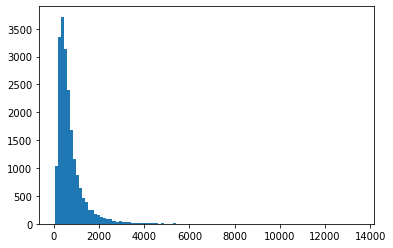

In [252]:
plt.hist(len_chars, 100);

In [253]:
np.sort(len_chars)[-25:]

array([ 6788,  6805,  7008,  7177,  7230,  7241,  7364,  7579,  7632,
        7802,  7912,  7993,  8317,  8553,  8692,  8953,  9339,  9351,
        9712,  9748, 10062, 10420, 11014, 12738, 13501])

In [254]:
np.argsort(len_chars)[-25:]

array([17074,  3049, 18917,  2797, 14765, 16790,  7027, 17759, 17966,
       18631, 16617,  3211,  3727,  2967, 20111,  2962, 18911,  6821,
       17953,  6823, 17800, 17777, 13003,  7049,  7072])

In [255]:
dataset.Review[17074]

'rummy fun gran bahia boats beaches bars just funny smell trying not panic booking edenh real january, sure it__Ç_éêl fine__Çî__hose people probably just picky__Ç yeah that__Ç_é_ it__Çî_\x8dlass beach, no problem__Çî_\x91istfights beach chairs, panic rising well__Çî__ey, doesn__Ç_é_ love good brawl br/ sears travel called tell resort overbooked went like sears edenh overbooked, wondering__Ç br/ yesyes thousand times yes.we mentally prepared air canada vacations super-annoying three-flight deal london-toronto-montreal-punta cana, not prepared london flight cancelled weather, left london airport 8 hoped weather barred planes taking we__Ç_éö able toronto time, arrived 11:10 11:45 flight frightfully added 160 parking fee trip, luckily toronto flight delayed ended montreal airport 2, punta cana airport delightful, thatched roof local musicians playing enter winsome locals costumed 8 photo opportunity it__Ç_é_ fun, air canada gave card covered 10 entrance fee country, time punta cana 25 depa

In [256]:
dataset.Rating[17074]

4

(array([  8.,  40.,  83., 137., 199., 296., 311., 380., 430., 497., 482.,
        543., 520., 561., 585., 532., 537., 537., 571., 499., 530., 475.,
        470., 450., 474., 445., 428., 409., 349., 372., 372., 350., 299.,
        303., 297., 282., 246., 294., 246., 194., 196., 188., 196., 172.,
        173., 142., 170., 156., 147., 138., 139., 111., 120., 121., 117.,
         97., 106.,  91.,  91., 105.,  86.,  75.,  82.,  81.,  61.,  72.,
         49.,  59.,  59.,  63.,  50.,  63.,  61.,  48.,  59.,  55.,  42.,
         47.,  36.,  26.,  36.,  37.,  35.,  48.,  31.,  36.,  40.,  23.,
         38.,  35.,  35.,  32.,  30.,  20.,  21.,  26.,  19.,  18.,  19.,
         16.]),
 array([  44.  ,   63.54,   83.08,  102.62,  122.16,  141.7 ,  161.24,
         180.78,  200.32,  219.86,  239.4 ,  258.94,  278.48,  298.02,
         317.56,  337.1 ,  356.64,  376.18,  395.72,  415.26,  434.8 ,
         454.34,  473.88,  493.42,  512.96,  532.5 ,  552.04,  571.58,
         591.12,  610.66,  630.2 ,

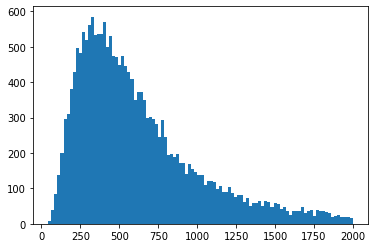

In [257]:
plt.hist(len_chars[len_chars < 2000], 100)

In [258]:
np.sort(len_chars)[1]

44

In [259]:
dataset.Review[44]

"austin powers decor familiar, hotel seattlewhere sheets 3 different colors hair.but okbecause clean second day.the bathroom friend cringe.she asked brought flip flops sanitizer spray.the dirty shag carpet did n't stop wall.it crawled inches.i star saw shining worse,  "

In [260]:
dataset.Rating[44]

2

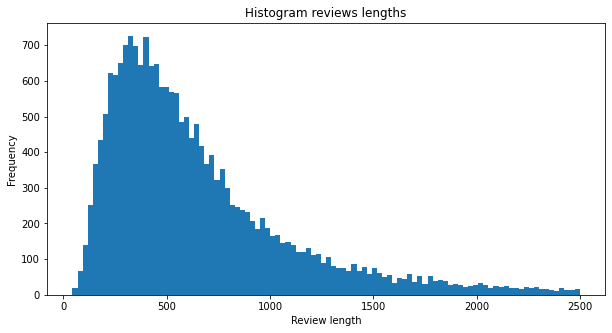

In [261]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(len_chars[np.logical_and(len_chars > 1, len_chars < 2500)], 100)
ax.set_title('Histogram reviews lengths')
ax.set_xlabel('Review length')
ax.set_ylabel('Frequency');

#### The next step we will see how reviews are destributed by rating 

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64


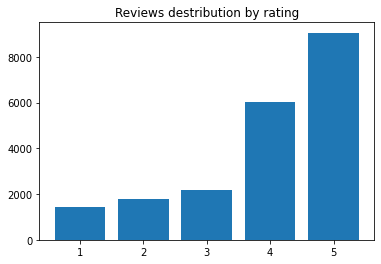

In [262]:
class_dist = dataset['Rating'].value_counts()
print(class_dist)
index = class_dist.index
values = class_dist.values
plt.title('Reviews destribution by rating')
plt.bar(index,values)
plt.show()

#### Tokenize reviews

In [263]:
nltk.word_tokenize(dataset.Review[100])

['great',
 'location',
 'staff',
 'location',
 'price',
 'make',
 'older',
 'hotel',
 'good',
 'choice',
 ',',
 'staff',
 'friendly',
 ',',
 'looking',
 'modern',
 'place',
 'not',
 ',',
 'old',
 'studio',
 'apartment',
 'building',
 'run',
 'hotel',
 ',',
 'great',
 'neighborhood',
 'close',
 'great',
 'local',
 'resturants',
 ',',
 'hotel',
 'does',
 'not',
 'sterile',
 'tourist',
 'feeling',
 'newer',
 'mid',
 'range',
 'hotels',
 ',',
 'feels',
 'like',
 'small',
 'european',
 'hotel',
 ',',
 'yes',
 'rooms',
 'use',
 'little',
 'moderizing',
 'compermise',
 ',',
 'just',
 'reservations',
 'stay',
 ',']

In [264]:
tokenized_reviews = [ nltk.word_tokenize(doc) for doc in dataset.Review ]
tokenized_reviews[0]

['nice',
 'hotel',
 'expensive',
 'parking',
 'got',
 'good',
 'deal',
 'stay',
 'hotel',
 'anniversary',
 ',',
 'arrived',
 'late',
 'evening',
 'took',
 'advice',
 'previous',
 'reviews',
 'did',
 'valet',
 'parking',
 ',',
 'check',
 'quick',
 'easy',
 ',',
 'little',
 'disappointed',
 'non-existent',
 'view',
 'room',
 'room',
 'clean',
 'nice',
 'size',
 ',',
 'bed',
 'comfortable',
 'woke',
 'stiff',
 'neck',
 'high',
 'pillows',
 ',',
 'not',
 'soundproof',
 'like',
 'heard',
 'music',
 'room',
 'night',
 'morning',
 'loud',
 'bangs',
 'doors',
 'opening',
 'closing',
 'hear',
 'people',
 'talking',
 'hallway',
 ',',
 'maybe',
 'just',
 'noisy',
 'neighbors',
 ',',
 'aveda',
 'bath',
 'products',
 'nice',
 ',',
 'did',
 'not',
 'goldfish',
 'stay',
 'nice',
 'touch',
 'taken',
 'advantage',
 'staying',
 'longer',
 ',',
 'location',
 'great',
 'walking',
 'distance',
 'shopping',
 ',',
 'overall',
 'nice',
 'experience',
 'having',
 'pay',
 '40',
 'parking',
 'night',
 ',']

In [265]:
tokenized_reviews = [ [word.lower() for word in doc] for doc in tokenized_reviews ] 

In [266]:
len_words = np.array( [len(tokenized_review) for tokenized_review in tokenized_reviews] )

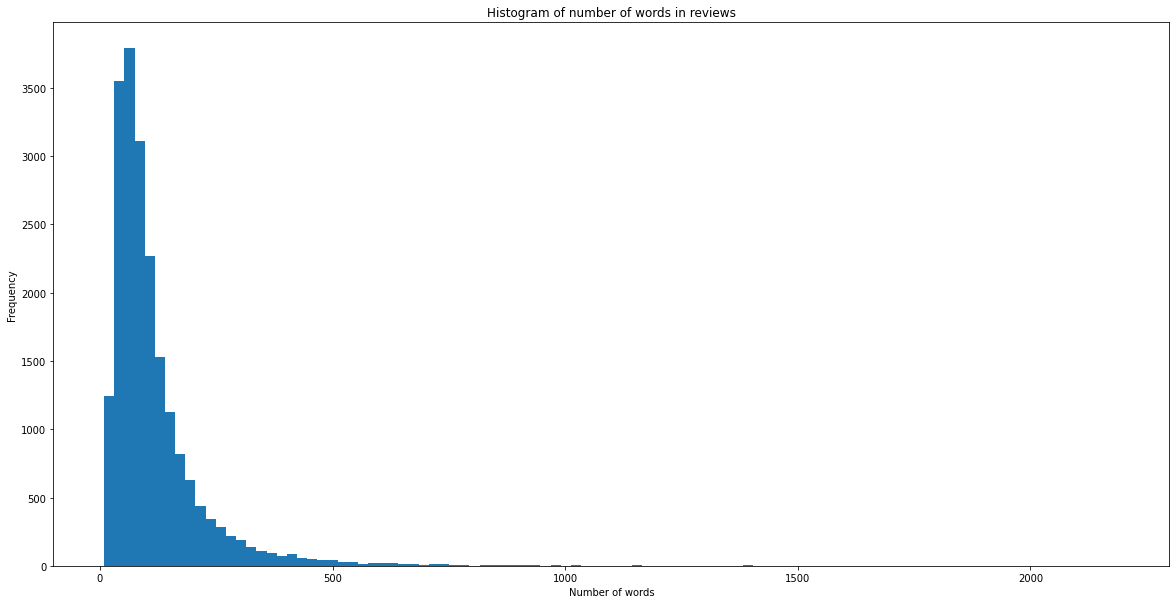

In [267]:
fig, ax = plt.subplots(figsize=(20,10)) 
ax.hist(len_words, 100)
ax.set_title('Histogram of number of words in reviews')
ax.set_xlabel('Number of words')
ax.set_ylabel('Frequency');

In [268]:
np.sort(len_words[-10:])

array([ 40,  41,  69,  70,  97, 102, 111, 115, 121, 836])

In [269]:
np.argsort(len_words[-100:])

array([57, 27, 34,  6, 19, 61, 82,  9, 17, 67, 20, 58, 89, 56, 81, 47, 18,
       79, 96, 90, 78, 62, 33, 74,  3, 60,  2, 51, 22, 52, 44, 16, 26, 83,
       49, 30, 15, 13, 14, 24, 84,  0, 38, 23, 42, 92, 97, 35, 80,  7, 43,
       76, 32, 86, 37, 54, 31,  4,  1, 68,  5,  8, 11, 21, 55, 41, 94, 25,
       99, 36, 75, 93, 48, 45, 71, 28, 91, 69, 87, 95, 73, 66, 63, 29, 64,
       53, 39, 65, 72, 12, 77, 85, 50, 40, 10, 70, 88, 59, 46, 98])

In [270]:
tokenized_reviews[98]

['great',
 'price',
 'okay',
 'experience',
 'stayed',
 'inn',
 'queen',
 'anne',
 'nights',
 'mid-january',
 '2007.',
 'price',
 'good',
 '79/night',
 'room',
 'fine',
 ',',
 'old',
 'shabby',
 'clean',
 'comfortable',
 ',',
 'having',
 'kitchenette',
 'microwave',
 'stove',
 'sink',
 'fridge',
 'great',
 'room',
 'surprisingly',
 'large',
 'walk-in',
 'closet',
 ',',
 'service',
 'friendly',
 'no',
 'warned',
 'desk',
 'staff',
 'leaves',
 '11:00',
 'pm',
 ',',
 'calls',
 'desk',
 'hour',
 'fielded',
 'staff',
 'hotel',
 'problem',
 'example',
 'needed',
 'request',
 'iron',
 'ironing',
 'board',
 'morning',
 "n't",
 'able',
 'guy',
 'hotel',
 "n't",
 'queen',
 'anne',
 'answer',
 'phone',
 ',',
 'inn',
 'queen',
 'anne',
 'no',
 'elevator',
 "n't",
 'problem',
 'big',
 'problem',
 'some.the',
 'downside',
 'noise',
 ',',
 'hotel',
 'no',
 'soundproofing',
 'rooms',
 'night',
 'bed',
 '2:30',
 'ask',
 'next-door',
 'neighbors',
 'kind',
 'party',
 'going',
 'hold',
 ',',
 'morning',


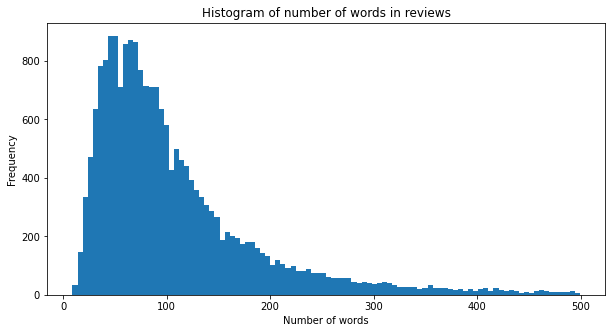

In [271]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist( len_words[np.logical_and(len_words > 1, len_words < 500)], 100 )
ax.set_title('Histogram of number of words in reviews')
ax.set_xlabel('Number of words')
ax.set_ylabel('Frequency');

In [272]:
all_words = [word for doc in tokenized_reviews for word in doc]

In [273]:
all_words_counter = Counter(all_words)

In [274]:
all_words_counter.most_common(40)

[(',', 246646),
 ('hotel', 48811),
 ('room', 34270),
 ('not', 31542),
 ('great', 21090),
 ("n't", 18987),
 ('good', 16966),
 ('staff', 16197),
 ('stay', 15142),
 ('did', 13895),
 ('just', 12600),
 ('nice', 12403),
 ('rooms', 12003),
 ('no', 11609),
 ('location', 11013),
 ('stayed', 10465),
 ('service', 9939),
 ('time', 9810),
 ('beach', 9566),
 ('night', 9417),
 ('clean', 9359),
 ('day', 9331),
 ('breakfast', 9266),
 ('food', 8971),
 ('like', 8115),
 ('resort', 7910),
 ('really', 7763),
 ('place', 7684),
 ('pool', 7148),
 ('people', 6759),
 ('friendly', 6665),
 ('small', 6520),
 ('little', 6241),
 ('got', 6186),
 ('walk', 6090),
 ('excellent', 5999),
 ('area', 5924),
 ('best', 5669),
 ('2', 5559),
 ('helpful', 5449)]

Text(0.5, 1.0, 'The 25 most common words')

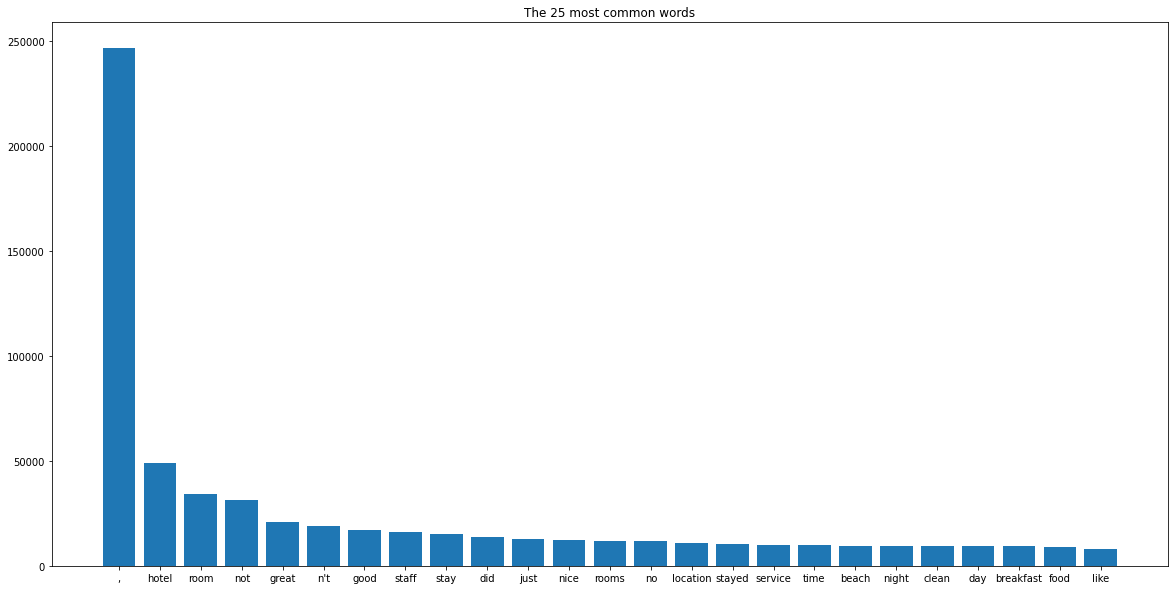

In [275]:
x, y = zip( *all_words_counter.most_common(25) )
fig, ax = plt.subplots(figsize = (20, 10))
ax.bar(x, y)
ax.set_title('The 25 most common words')

#### Keeping words

In [276]:
filtered_words = [word for word in all_words if word.isalpha()]
filtered_words_counter = Counter (filtered_words)

Text(0.5, 1.0, 'The 25 most common words')

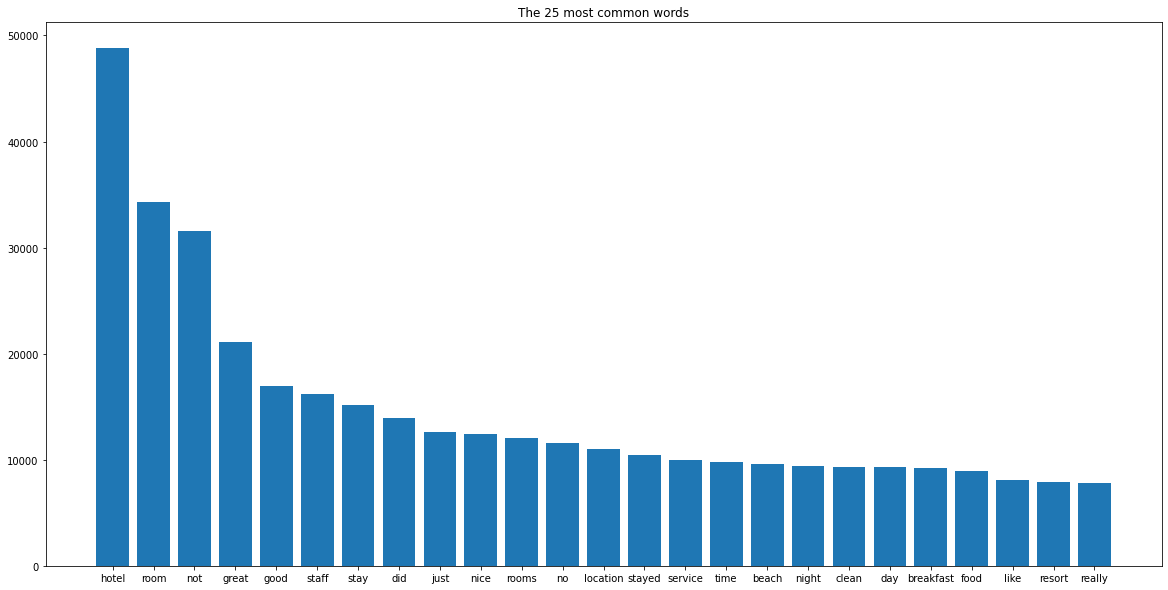

In [277]:
x, y = zip( *filtered_words_counter.most_common(25) )
fig, ax = plt.subplots(figsize = (20, 10))
ax.bar(x, y)
ax.set_title('The 25 most common words')

#### Discarding stopwords

In [278]:
stopwords = set(nltk.corpus.stopwords.words('english'))
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [279]:
filtered_words_stop = [word for word in filtered_words if word not in stopwords]
filtered_words_stop_counter = Counter(filtered_words_stop)

Text(0.5, 1.0, 'The 25 most common words')

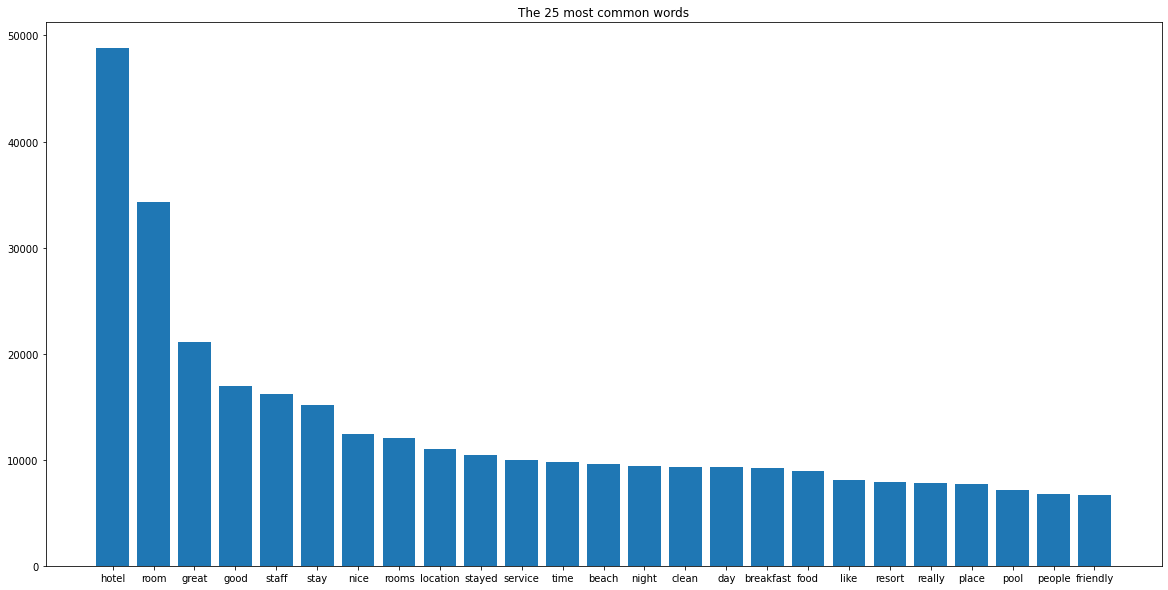

In [280]:
x, y = zip( *filtered_words_stop_counter.most_common(25) )
fig, ax = plt.subplots(figsize = (20, 10))
ax.bar(x, y)
ax.set_title('The 25 most common words')

#### Why is "staff" so frequent?

In [281]:
def concordance (words, target_word, contex_width = 3, contex_num = 20):
    concordance_gen = (filtered_words[ i-contex_width: i+contex_width ] for i, word in enumerate(filtered_words) if word == target_word)
    return list(islice(concordance_gen, contex_num))

In [282]:
concordance(all_words, 'staff')

[['guess', 'tell', 'concerned', 'staff', 'ranged', 'indifferent'],
 ['not', 'better', 'housekeeping', 'staff', 'cleaner', 'room'],
 ['great', 'feature', 'great', 'staff', 'friendly', 'free'],
 ['complain', 'room', 'huge', 'staff', 'helpful', 'booked'],
 ['tell', 'love', 'monaco', 'staff', 'husband', 'stayed'],
 ['clothing', 'luggage', 'hotel', 'staff', 'friendly', 'efficient'],
 ['friendly', 'efficient', 'housekeeping', 'staff', 'did', 'great'],
 ['positive', 'experience', 'excellent', 'staff', 'housekeeping', 'quality'],
 ['quality', 'hotel', 'chocked', 'staff', 'make', 'feel'],
 ['exceptional', 'service', 'desk', 'staff', 'concierge', 'door'],
 ['soiled', 'sheets', 'used', 'staff', 'quickley', 'resolved'],
 ['tasting', 'nice', 'touch', 'staff', 'went', 'way'],
 ['past', 'delight', 'reception', 'staff', 'friendly', 'professional'],
 ['small', 'dog', 'received', 'staff', 'guests', 'spoke'],
 ['whimsical', 'vibe', 'fun', 'staff', 'young', 'casual'],
 ['hotel', 'not', 'nice', 'staff', 'h

#### Language models

In [283]:
bigrams = nltk.bigrams(all_words)
bigrams

<generator object bigrams at 0x7fa73a3c7e40>

In [284]:
all_words[:5]

['nice', 'hotel', 'expensive', 'parking', 'got']

In [285]:
list(islice(bigrams, 20))

[('nice', 'hotel'),
 ('hotel', 'expensive'),
 ('expensive', 'parking'),
 ('parking', 'got'),
 ('got', 'good'),
 ('good', 'deal'),
 ('deal', 'stay'),
 ('stay', 'hotel'),
 ('hotel', 'anniversary'),
 ('anniversary', ','),
 (',', 'arrived'),
 ('arrived', 'late'),
 ('late', 'evening'),
 ('evening', 'took'),
 ('took', 'advice'),
 ('advice', 'previous'),
 ('previous', 'reviews'),
 ('reviews', 'did'),
 ('did', 'valet'),
 ('valet', 'parking')]

In [286]:
bigrams = nltk.bigrams(all_words)
cond_freqs = nltk.ConditionalFreqDist(bigrams)

In [287]:
cond_freqs['clean']

FreqDist({',': 1684, 'comfortable': 546, 'room': 258, 'modern': 256, 'staff': 228, 'rooms': 207, 'spacious': 185, 'quiet': 157, 'nice': 135, 'hotel': 135, ...})

In [288]:
cond_freqs['breakfast']

FreqDist({',': 843, 'buffet': 665, 'good': 377, 'included': 329, 'room': 322, 'morning': 224, 'lunch': 217, 'hotel': 193, 'great': 188, 'not': 155, ...})

In [289]:
cond_freqs['staff']

FreqDist({'friendly': 2022, ',': 1231, 'helpful': 949, 'great': 381, 'extremely': 374, 'not': 337, 'nice': 316, 'hotel': 267, 'really': 229, 'excellent': 217, ...})

In [290]:
cond_freqs['pool']

FreqDist({',': 740, 'area': 548, 'beach': 372, 'bar': 333, 'nice': 151, 'great': 119, 'small': 93, 'not': 81, 'ocean': 65, 'beautiful': 57, ...})

In [291]:
cond_freqs['time']

FreqDist({',': 2185, 'room': 156, 'hotel': 135, 'year': 111, 'stayed': 105, 'did': 95, 'not': 94, 'day': 93, 'share': 86, 'got': 73, ...})

#### Bigrams

In [292]:
bigrams = nltk.bigrams(filtered_words)
freq_pd = nltk.FreqDist(filtered_words)
cond_pd = nltk.ConditionalProbDist(nltk.ConditionalFreqDist(bigrams), nltk.MLEProbDist)

In [293]:
freq_pd.freq('hotel')

0.024394754110814185

In [294]:
cond_pd['hotel'].freqdist()

FreqDist({'great': 1615, 'staff': 1218, 'not': 925, 'stayed': 907, 'room': 793, 'good': 766, 'location': 578, 'just': 558, 'excellent': 531, 'nice': 521, ...})

In [295]:
def generate_text(cond_pd, start, length):
    text = []
    word = start
    for i in range (length):
        text.append(word)
        word = cond_pd[word].generate()
    return text

In [296]:
generate_text(cond_pd, 'room', 8)

['room', 'beds', 'requested', 'high', 'end', 'central', 'manhattan', 'hilton']

#### Trigrams

In [297]:
trigrams = nltk.trigrams(filtered_words)
trigrams = (( (w1, w2),w3) for w1, w2, w3 in trigrams ) 
cond_pd = nltk.ConditionalProbDist(nltk.ConditionalFreqDist(trigrams), nltk.MLEProbDist)

In [298]:
def generate_text(cond_pd, start, length):
    word1, word2 = start
    text = [word1]
    for i in range(length):
        text.append(word2)
        try:
            word = cond_pd[ (word1, word2) ].generate()
        except:
            print('The pair {} is not among the conditions of our trigram model, stopping'.format((word1, word2)))
            break
        word1 = word2
        word2 = word
    return text

In [299]:
cond_pd['hotel', 'staff'].freqdist()

FreqDist({'friendly': 200, 'helpful': 80, 'extremely': 44, 'not': 30, 'nice': 25, 'excellent': 22, 'great': 22, 'pleasant': 19, 'did': 19, 'courteous': 15, ...})

In [300]:
generate_text(cond_pd, ('hotel', 'night'), 8)

['hotel',
 'night',
 'instead',
 'lost',
 'load',
 'money',
 'slot',
 'machines',
 'alot']

### Conducting Machine Learning Experiments

In [301]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score, KFold, ShuffleSplit, GridSearchCV, RandomizedSearchCV
from nltk import word_tokenize
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/nick/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [302]:
dataset[12:15]

,Review,Rating
12,nice hotel good location hotel kimpton design ...,4
13,nice hotel not nice staff hotel lovely staff q...,3
14,"great hotel night quick business trip, loved l...",4


#### Small bag of words and TFIDF example

In [303]:
corpus = dataset.Review[:20]
count_vectorizer = CountVectorizer( stop_words = 'english', max_df = 0.95, min_df = 2, max_features = 20 )
bows = count_vectorizer.fit_transform(corpus)
pd.DataFrame(bows.toarray(), columns=count_vectorizer.get_feature_names())

,bed,comfortable,desk,did,good,got,great,hotel,kimpton,like,monaco,morning,nice,night,room,seattle,service,staff,stay,suite
0,1,1,0,2,1,1,1,2,0,1,0,1,5,2,3,0,0,0,2,0
1,0,1,4,2,4,3,1,5,3,2,0,1,1,2,6,3,0,2,1,4
2,2,1,3,3,1,2,3,3,0,0,1,3,3,5,8,1,1,0,4,3
3,0,0,0,2,0,0,3,4,0,2,2,0,2,0,1,0,1,1,2,2
4,0,0,1,5,1,1,4,2,0,0,0,0,0,0,2,0,2,1,2,0
5,0,0,1,0,1,0,0,2,0,0,1,1,0,0,2,1,1,1,2,1
6,0,3,0,1,2,0,1,1,0,0,1,0,0,0,2,1,0,2,2,2
7,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,2,6,0,0
8,2,0,0,0,0,0,2,3,0,1,1,0,0,0,2,0,0,0,0,0
9,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,2,0,0


In [304]:
corpus = dataset.Review[:20]
tfidf_vectorizer = TfidfVectorizer( stop_words='english', max_df = 0.95, min_df = 2, max_features = 20 )
bows = tfidf_vectorizer.fit_transform(corpus)
pd.DataFrame(bows.toarray(), columns=count_vectorizer.get_feature_names())

,bed,comfortable,desk,did,good,got,great,hotel,kimpton,like,monaco,morning,nice,night,room,seattle,service,staff,stay,suite
0,0.154211,0.154211,0.000000,0.327077,0.138070,0.173966,0.124424,0.185696,0.000000,0.145773,0.000000,0.173966,0.654922,0.347931,0.306526,0.000000,0.000000,0.000000,0.225205,0.000000
1,0.000000,0.083067,0.352364,0.176182,0.297490,0.281123,0.067022,0.250065,0.380284,0.157044,0.000000,0.093708,0.070556,0.187415,0.330224,0.264273,0.000000,0.134043,0.060654,0.429705
2,0.166467,0.083234,0.264804,0.264804,0.074522,0.187792,0.201469,0.150341,0.000000,0.000000,0.070697,0.281688,0.212092,0.469480,0.441183,0.088268,0.074522,0.000000,0.243103,0.322926
3,0.000000,0.000000,0.000000,0.352431,0.000000,0.000000,0.402206,0.400181,0.000000,0.314147,0.282276,0.000000,0.282276,0.000000,0.110096,0.000000,0.148773,0.134069,0.242662,0.429787
4,0.000000,0.000000,0.148605,0.743023,0.125462,0.158080,0.452247,0.168738,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.185690,0.000000,0.250924,0.113062,0.204640,0.000000
5,0.000000,0.000000,0.288534,0.000000,0.243600,0.000000,0.000000,0.327626,0.000000,0.000000,0.231098,0.306931,0.000000,0.000000,0.360539,0.288534,0.243600,0.219523,0.397333,0.351865
6,0.000000,0.553535,0.000000,0.195672,0.330399,0.000000,0.148871,0.111091,0.000000,0.000000,0.156721,0.000000,0.000000,0.000000,0.244503,0.195672,0.000000,0.297743,0.269455,0.477240
7,0.176235,0.000000,0.186895,0.000000,0.157789,0.000000,0.142194,0.106108,0.000000,0.166593,0.000000,0.000000,0.149691,0.000000,0.000000,0.000000,0.315579,0.853162,0.000000,0.000000
8,0.549702,0.000000,0.000000,0.000000,0.000000,0.000000,0.443521,0.496449,0.000000,0.259812,0.233454,0.000000,0.000000,0.000000,0.364214,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.384107,0.384107,0.000000,0.000000,0.000000,0.000000,0.309913,0.231264,0.000000,0.000000,0.326254,0.000000,0.000000,0.000000,0.254497,0.000000,0.000000,0.619826,0.000000,0.000000


#### Classifying rating

#### Obtain labeled examples

In [305]:
num_of_features = 5000
num_of_examples = 10000

In [306]:
count_vectorizer = CountVectorizer( stop_words = 'english', max_df = 0.95, min_df = 2, max_features = num_of_features )

In [307]:
corpus = dataset.Review[:num_of_examples]

In [308]:
print(corpus[666])

fun weekend adams mark n't know definitely stay, went business conference thousands people business conferences including staying hotel, lively bustling building right middle downtown tall breath fresh air grew big city, sports bar fun pool hall people dancing, restaurant overcrowded room service great loved walkways buildings close vicinity public transportation, unfortunately downtown dallas large just looks walking extremely cold day felt dangerous n't walk far crazed homeless people cold, dart kind like subway trolley good way city buses punctual, dart station right outside hotel convenient, service good people helpful, asked verbal tour lot patience ask, room great view great bathtub, definitely recommend anybody willing spend bucks stay,  


In [309]:
bows = count_vectorizer.fit_transform(corpus)
bows

<10000x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 724135 stored elements in Compressed Sparse Row format>

In [310]:
vocabulary = count_vectorizer.get_feature_names()
vocabulary

['00',
 '000',
 '00am',
 '00pm',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '10',
 '100',
 '1000',
 '10am',
 '10mins',
 '10pm',
 '10th',
 '11',
 '110',
 '11am',
 '11pm',
 '11th',
 '12',
 '120',
 '125',
 '12th',
 '13',
 '130',
 '13th',
 '14',
 '140',
 '14th',
 '15',
 '150',
 '15th',
 '16',
 '160',
 '16th',
 '17',
 '17th',
 '18',
 '18th',
 '19',
 '19th',
 '1am',
 '1pm',
 '1st',
 '20',
 '200',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '20th',
 '21',
 '21st',
 '22',
 '22nd',
 '23',
 '23rd',
 '24',
 '24th',
 '25',
 '250',
 '25th',
 '26',
 '26th',
 '27',
 '27th',
 '28',
 '28th',
 '29',
 '29th',
 '2am',
 '2nd',
 '2pm',
 '30',
 '300',
 '3000',
 '30am',
 '30pm',
 '30th',
 '31',
 '31st',
 '32',
 '33',
 '35',
 '350',
 '36',
 '39',
 '3am',
 '3pm',
 '3rd',
 '40',
 '400',
 '40th',
 '41',
 '414',
 '42',
 '42nd',
 '45',
 '48',
 '4am',
 '4pm',
 '4th',
 '50',
 '500',
 '50th',
 '55',
 '5am',
 '5pm',
 '5th',
 '60',
 '600',
 '65',
 '6am',
 '6pm',
 '6th',
 '70',
 '75',
 '79',


In [311]:
bows[100]

<1x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 40 stored elements in Compressed Sparse Row format>

In [312]:
bows[100][bows[100].nonzero()]

matrix([[4, 1, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [313]:
[vocabulary[ind] for ind in bows[100].nonzero()[1]]

['hotel',
 'good',
 'stay',
 'little',
 'like',
 'just',
 'location',
 'great',
 'staff',
 'neighborhood',
 'hotels',
 'does',
 'run',
 'make',
 'building',
 'rooms',
 'use',
 'choice',
 'price',
 'friendly',
 'place',
 'small',
 'resturants',
 'close',
 'mid',
 'looking',
 'tourist',
 'yes',
 'newer',
 'reservations',
 'old',
 'range',
 'feels',
 'modern',
 'european',
 'apartment',
 'older',
 'studio',
 'local',
 'feeling']

In [314]:
dataset.Rating

0        4
1        2
2        3
3        5
4        5
        ..
20486    5
20487    4
20488    2
20489    1
20490    2
Name: Rating, Length: 20491, dtype: int64

In [315]:
ratings = dataset.Rating[:num_of_examples]

In [316]:
ratings[:10]

0    4
1    2
2    3
3    5
4    5
5    5
6    5
7    4
8    5
9    5
Name: Rating, dtype: int64

In [317]:
set(ratings)

{1, 2, 3, 4, 5}

#### Produce training and test data

In [318]:
test_proportion = 0.1
separating_index = int(len(ratings) * (1-test_proportion))
X = bows[:separating_index]
y = ratings[:separating_index]
X_test = bows[separating_index:]
y_test = ratings[separating_index:]

In [319]:
X.shape, len(y), X_test.shape, len(y_test)

((9000, 5000), 9000, (1000, 5000), 1000)

#### Linear SVM

In [320]:
svc = svm.LinearSVC()
svc.fit(X, y)

/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [321]:
svc.predict(X_test[:20]), y_test[:20]

(array([4, 5, 5, 4, 5, 5, 4, 4, 4, 5, 4, 1, 4, 4, 1, 3, 2, 3, 3, 4]),
 9000    4
 9001    5
 9002    5
 9003    4
 9004    4
 9005    5
 9006    4
 9007    5
 9008    5
 9009    4
 9010    5
 9011    1
 9012    5
 9013    3
 9014    1
 9015    2
 9016    1
 9017    3
 9018    4
 9019    1
 Name: Rating, dtype: int64)

In [322]:
svc.score(X_test, y_test)

0.491

#### Confusion matrix

In [323]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, svc.predict(X_test))
confusion_matrix[:10, :10]

array([[ 31,  10,   9,   6,   3],
       [  6,  23,  20,  17,   8],
       [  5,  12,  31,  58,  18],
       [  1,  15,  37, 168, 127],
       [  5,   8,  12, 132, 238]])

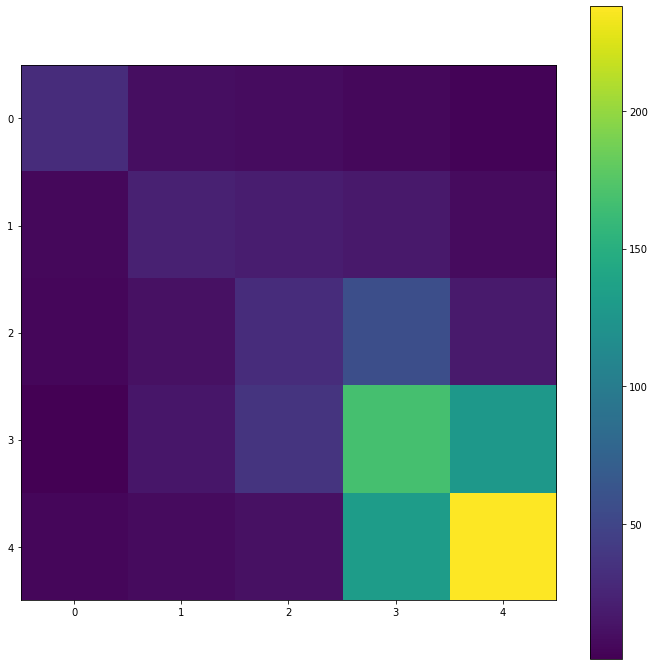

In [324]:
plt.figure(figsize=(12, 12))
plt.imshow(confusion_matrix)
plt.colorbar()

This confusion matrix I can explain in a way that it is really hard to predict such abstract topic like hotel reviews. On the one hand, the little amount of negative reviews data (~6k) doesn't allow to predict correct rating for negative reviews, but on the other hand prediction for positive reviews is more appropriate.

#### Cross validation

In [325]:
X, X_test, y, y_test = train_test_split(bows, ratings, test_size=0.1, shuffle=False)

In [326]:
X.shape, len(y), X_test.shape, len(y_test)

((9000, 5000), 9000, (1000, 5000), 1000)

In [327]:
svc = svm.LinearSVC()
svc.fit(X, y)
svc.score(X_test, y_test)

0.49

In [328]:
X, X_test, y, y_test = train_test_split(bows, ratings, test_size=0.1, shuffle=True)

In [329]:
svc = svm.LinearSVC()
svc.fit(X, y)
svc.score(X_test, y_test)

0.52

K-fold

In [330]:
cross_val_score(svc, bows, ratings, cv=10)

/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


array([0.494, 0.502, 0.483, 0.465, 0.508, 0.492, 0.489, 0.482, 0.499,
       0.478])

In [331]:
cvr = cross_val_score(svc, bows, ratings, cv=KFold(n_splits=10))
cvr.mean(), cvr.std()

(0.4965, 0.026382759522081845)

Shuffle and split

In [332]:
cross_val_score(svc, bows, ratings, cv=ShuffleSplit(n_splits=10, test_size=0.05)).mean()

0.5172000000000001

#### TF-IDF

In [333]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=num_of_features, stop_words='english')

In [334]:
bows = tfidf_vectorizer.fit_transform(corpus)
bows

<10000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 724135 stored elements in Compressed Sparse Row format>

In [335]:
vocabulary = tfidf_vectorizer.get_feature_names()
vocabulary

['00',
 '000',
 '00am',
 '00pm',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '10',
 '100',
 '1000',
 '10am',
 '10mins',
 '10pm',
 '10th',
 '11',
 '110',
 '11am',
 '11pm',
 '11th',
 '12',
 '120',
 '125',
 '12th',
 '13',
 '130',
 '13th',
 '14',
 '140',
 '14th',
 '15',
 '150',
 '15th',
 '16',
 '160',
 '16th',
 '17',
 '17th',
 '18',
 '18th',
 '19',
 '19th',
 '1am',
 '1pm',
 '1st',
 '20',
 '200',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '20th',
 '21',
 '21st',
 '22',
 '22nd',
 '23',
 '23rd',
 '24',
 '24th',
 '25',
 '250',
 '25th',
 '26',
 '26th',
 '27',
 '27th',
 '28',
 '28th',
 '29',
 '29th',
 '2am',
 '2nd',
 '2pm',
 '30',
 '300',
 '3000',
 '30am',
 '30pm',
 '30th',
 '31',
 '31st',
 '32',
 '33',
 '35',
 '350',
 '36',
 '39',
 '3am',
 '3pm',
 '3rd',
 '40',
 '400',
 '40th',
 '41',
 '414',
 '42',
 '42nd',
 '45',
 '48',
 '4am',
 '4pm',
 '4th',
 '50',
 '500',
 '50th',
 '55',
 '5am',
 '5pm',
 '5th',
 '60',
 '600',
 '65',
 '6am',
 '6pm',
 '6th',
 '70',
 '75',
 '79',


In [336]:
bows[100][bows[100].nonzero()]

matrix([[0.19155877, 0.15606258, 0.28163897, 0.18767959, 0.23810744,
         0.17515238, 0.14690065, 0.23562808, 0.20170364, 0.12097218,
         0.15460381, 0.23386672, 0.15567337, 0.17046956, 0.13023614,
         0.19674367, 0.11686561, 0.22801354, 0.09410546, 0.09010949,
         0.08653753, 0.11237617, 0.13958799, 0.12657798, 0.07399844,
         0.14550308, 0.11199482, 0.1622369 , 0.14229591, 0.10994951,
         0.1958664 , 0.12125897, 0.18911045, 0.14746343, 0.07710075,
         0.09047222, 0.09924503, 0.0650589 , 0.07077983, 0.19277257]])

In [337]:
[vocabulary[ind] for ind in bows[100].nonzero()[1]]

['feeling',
 'local',
 'studio',
 'older',
 'apartment',
 'european',
 'modern',
 'feels',
 'range',
 'old',
 'reservations',
 'newer',
 'yes',
 'tourist',
 'looking',
 'mid',
 'close',
 'resturants',
 'small',
 'place',
 'friendly',
 'price',
 'choice',
 'use',
 'rooms',
 'building',
 'make',
 'run',
 'does',
 'hotels',
 'neighborhood',
 'staff',
 'great',
 'location',
 'just',
 'like',
 'little',
 'stay',
 'good',
 'hotel']

In [338]:
svc = svm.LinearSVC()
cross_val_score(svc, bows, ratings, cv=10).mean()

0.5508

#### Stemming and lemmatizing

In [339]:
stemmer = nltk.stem.PorterStemmer()

In [340]:
lemmatizer = nltk.wordnet.WordNetLemmatizer()

In [341]:
class TransformTokenizer:
    def __init__(self, transform):
        self.transform = transform
        
    def __call__(self, doc):
        return [self.transform(word) for word in word_tokenize(doc)]

Stemming

In [342]:
tfidf_vectorizer_stemming = TfidfVectorizer( tokenizer = TransformTokenizer(stemmer.stem), max_df = 0.95, min_df = 2, max_features = num_of_features, stop_words = 'english' )

In [343]:
bows = tfidf_vectorizer_stemming.fit_transform(corpus)
bows

/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
 

<10000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 710034 stored elements in Compressed Sparse Row format>

In [344]:
vocabulary = tfidf_vectorizer_stemming.get_feature_names()
vocabulary

["'",
 '*',
 '.',
 '..',
 '0',
 '07',
 '08',
 '1',
 '1-2',
 '1.',
 '1.25',
 '1.5',
 '1.50',
 '1/2',
 '1/3',
 '10',
 '10-15',
 '10.',
 '10.00',
 '100',
 '100.00',
 '1000',
 '101',
 '10:00',
 '10:30',
 '10:30pm',
 '10am',
 '10min',
 '10pm',
 '10th',
 '11',
 '11.',
 '110',
 '11:00',
 '11:30',
 '11am',
 '11pm',
 '11th',
 '12',
 '12.',
 '120',
 '125',
 '12:00',
 '12:30',
 '12pm',
 '12th',
 '13',
 '130',
 '13th',
 '14',
 '140',
 '14th',
 '15',
 '15-20',
 '150',
 '15min',
 '15th',
 '16',
 '160',
 '16th',
 '17',
 '17th',
 '18',
 '18th',
 '19',
 '199',
 '19th',
 '1:30',
 '1am',
 '1pm',
 '1st',
 '2',
 '2-3',
 '2.',
 '2.00',
 '2.5',
 '2.50',
 '20',
 '20-30',
 '20.00',
 '200',
 '200.00',
 '200/night',
 '2000',
 '2001',
 '2002',
 '2003',
 '2003.',
 '2004',
 '2004.',
 '2005',
 '2005.',
 '2006',
 '2006.',
 '2007',
 '2007.',
 '2008',
 '2008.',
 '20min',
 '20th',
 '21',
 '21st',
 '22',
 '22nd',
 '23',
 '23rd',
 '24',
 '24-hour',
 '24/7',
 '24hr',
 '24th',
 '25',
 '250',
 '25th',
 '26',
 '26th',
 '27',


In [345]:
bows[100][bows[100].nonzero()]

matrix([[0.24477064, 0.16699974, 0.22708561, 0.14394318, 0.26198638,
         0.18329572, 0.18560486, 0.14339513, 0.119654  , 0.22818973,
         0.15335815, 0.15250392, 0.20263792, 0.09211886, 0.08181585,
         0.2912105 , 0.243028  , 0.085177  , 0.09790128, 0.09886561,
         0.12864273, 0.10275787, 0.13482329, 0.09845464, 0.14333472,
         0.13900303, 0.18865362, 0.18295257, 0.11959761, 0.12534222,
         0.18517679, 0.13381591, 0.07538094, 0.10624074, 0.08455278,
         0.04459366, 0.09696076, 0.05036813, 0.06933751, 0.23196451]])

In [346]:
[vocabulary[ind] for ind in bows[100].nonzero()[1]]

['moder',
 'european',
 'mid',
 'local',
 'studio',
 'older',
 'apart',
 'modern',
 'old',
 'newer',
 'ye',
 'tourist',
 'restur',
 'small',
 'place',
 'steril',
 'feel',
 'friendli',
 'look',
 'price',
 'choic',
 'use',
 'build',
 'make',
 'run',
 'doe',
 'neighborhood',
 'rang',
 'staff',
 'reserv',
 'great',
 'locat',
 'just',
 'close',
 'like',
 'room',
 'littl',
 'stay',
 'good',
 'hotel']

In [347]:
svc = svm.LinearSVC()
cross_val_score(svc, bows, ratings, cv=10).mean()

0.5465000000000002

Lemmatizing

In [348]:
tfidf_vectorizer_lemmatizing = TfidfVectorizer( tokenizer = TransformTokenizer(lemmatizer.lemmatize), max_df = 0.95, min_df = 2, max_features = num_of_features, stop_words = 'english' )

In [349]:
bows = tfidf_vectorizer_lemmatizing.fit_transform(corpus)
bows

/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


<10000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 713511 stored elements in Compressed Sparse Row format>

In [350]:
vocabulary = tfidf_vectorizer_lemmatizing.get_feature_names()
vocabulary

["'",
 '*',
 '.',
 '..',
 '0',
 '07',
 '08',
 '1',
 '1-2',
 '1.',
 '1.5',
 '1.50',
 '1/2',
 '1/3',
 '10',
 '10-15',
 '10.',
 '10.00',
 '100',
 '1000',
 '10:00',
 '10:30',
 '10am',
 '10mins',
 '10pm',
 '10th',
 '11',
 '11.',
 '110',
 '11:00',
 '11:30',
 '11am',
 '11pm',
 '11th',
 '12',
 '12.',
 '120',
 '125',
 '12:30',
 '12th',
 '13',
 '130',
 '13th',
 '14',
 '140',
 '14th',
 '15',
 '15-20',
 '150',
 '15th',
 '16',
 '160',
 '16th',
 '17',
 '17th',
 '18',
 '18th',
 '19',
 '19th',
 '1:30',
 '1am',
 '1pm',
 '1st',
 '2',
 '2-3',
 '2.',
 '2.00',
 '2.5',
 '2.50',
 '20',
 '20-30',
 '20.00',
 '200',
 '2001',
 '2002',
 '2003',
 '2003.',
 '2004',
 '2004.',
 '2005',
 '2005.',
 '2006',
 '2006.',
 '2007',
 '2007.',
 '2008',
 '2008.',
 '20mins',
 '20th',
 '21',
 '21st',
 '22',
 '22nd',
 '23',
 '23rd',
 '24',
 '24/7',
 '24th',
 '25',
 '250',
 '25th',
 '26',
 '26th',
 '27',
 '27th',
 '28',
 '28th',
 '29',
 '29th',
 '2:00',
 '2:30',
 '2am',
 '2nd',
 '2pm',
 '3',
 '3-4',
 '3-star',
 '3.',
 '3.5',
 '30',


In [351]:
bows[100][bows[100].nonzero()]

matrix([[0.17593784, 0.23923961, 0.19365446, 0.15322885, 0.27600832,
         0.19310601, 0.2300567 , 0.15184158, 0.20734084, 0.12609224,
         0.24040281, 0.16156613, 0.16140099, 0.13471462, 0.11951778,
         0.23541502, 0.09706578, 0.08758439, 0.13400066, 0.09008264,
         0.10905446, 0.1355279 , 0.13064808, 0.14286136, 0.11028018,
         0.16282679, 0.1464427 , 0.19875067, 0.12599866, 0.1404439 ,
         0.19524457, 0.15236925, 0.07941545, 0.09330154, 0.04698039,
         0.10216908, 0.06697105, 0.0732221 , 0.24437962]])

In [352]:
[vocabulary[ind] for ind in bows[100].nonzero()[1]]

['european',
 'mid',
 'feeling',
 'local',
 'studio',
 'older',
 'apartment',
 'modern',
 'range',
 'old',
 'newer',
 'yes',
 'tourist',
 'looking',
 'close',
 'resturants',
 'small',
 'place',
 'feel',
 'friendly',
 'price',
 'choice',
 'use',
 'building',
 'make',
 'run',
 'doe',
 'neighborhood',
 'staff',
 'reservation',
 'great',
 'location',
 'just',
 'like',
 'room',
 'little',
 'stay',
 'good',
 'hotel']

In [353]:
svc = svm.LinearSVC()
cross_val_score(svc, bows, ratings, cv=10).mean()

0.5431

#### Grid search and randomized search

In [354]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'loss': ['hinge', 'squared_hinge']}

In [355]:
X, X_test, y, y_test = train_test_split(bows, ratings, test_size=0.1, shuffle=False)

In [356]:
svc = svm.LinearSVC()
grid_search = GridSearchCV(svc, param_grid, n_jobs=-1, return_train_score=False)
grid_search.fit(X, y)

GridSearchCV(estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']})

In [357]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_loss,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.525632,0.046642,0.007617,0.005998,0.01,hinge,"{'C': 0.01, 'loss': 'hinge'}",0.490556,0.513889,0.483333,0.508333,0.479444,0.495111,0.013655,7
1,0.567782,0.040137,0.004584,0.000610,0.01,squared_hinge,"{'C': 0.01, 'loss': 'squared_hinge'}",0.488333,0.498889,0.468333,0.491111,0.477222,0.484778,0.010765,9
2,0.736065,0.138381,0.003966,0.000580,0.1,hinge,"{'C': 0.1, 'loss': 'hinge'}",0.526667,0.543889,0.512778,0.533889,0.517222,0.526889,0.011230,4
3,0.657650,0.059884,0.003660,0.000393,0.1,squared_hinge,"{'C': 0.1, 'loss': 'squared_hinge'}",0.590556,0.583333,0.579444,0.569444,0.569444,0.578444,0.008168,1
4,1.150791,0.043142,0.003592,0.000525,1,hinge,"{'C': 1, 'loss': 'hinge'}",0.582778,0.566111,0.580000,0.566111,0.573333,0.573667,0.006891,2
5,1.343737,0.075588,0.003458,0.000396,1,squared_hinge,"{'C': 1, 'loss': 'squared_hinge'}",0.561111,0.537778,0.561667,0.537778,0.557222,0.551111,0.010994,3
6,7.152181,0.412705,0.003510,0.000344,10,hinge,"{'C': 10, 'loss': 'hinge'}",0.516667,0.504444,0.512222,0.510556,0.515556,0.511889,0.004326,5
7,5.625954,0.313041,0.003426,0.000395,10,squared_hinge,"{'C': 10, 'loss': 'squared_hinge'}",0.506667,0.508889,0.502778,0.501111,0.527222,0.509333,0.009358,6
8,9.425499,1.310241,0.002515,0.000773,100,hinge,"{'C': 100, 'loss': 'hinge'}",0.477222,0.479444,0.478333,0.478333,0.505000,0.483667,0.010690,10
9,8.080694,0.758461,0.001612,0.000416,100,squared_hinge,"{'C': 100, 'loss': 'squared_hinge'}",0.481111,0.481667,0.477222,0.481667,0.509444,0.486222,0.011729,8


In [358]:
grid_search.score(X_test, y_test)

0.56

In [359]:
svc = svm.LinearSVC()
random_search = RandomizedSearchCV(svc, param_grid, n_iter=4, n_jobs=-1, return_train_score=False)
random_search.fit(X, y)

RandomizedSearchCV(estimator=LinearSVC(), n_iter=4, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'loss': ['hinge', 'squared_hinge']})

In [360]:
pd.DataFrame(random_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_loss,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.744014,0.319870,0.002118,0.000318,squared_hinge,10,"{'loss': 'squared_hinge', 'C': 10}",0.506667,0.508889,0.502778,0.501111,0.527222,0.509333,0.009358,2
1,1.365936,0.067712,0.003595,0.000361,squared_hinge,1,"{'loss': 'squared_hinge', 'C': 1}",0.561111,0.537778,0.561667,0.537778,0.557222,0.551111,0.010994,1
2,6.934306,0.517431,0.001588,0.000362,hinge,100,"{'loss': 'hinge', 'C': 100}",0.476111,0.477778,0.476111,0.476667,0.505000,0.482333,0.011350,4
3,0.485872,0.032566,0.003455,0.000399,hinge,0.01,"{'loss': 'hinge', 'C': 0.01}",0.490556,0.513889,0.483333,0.508333,0.479444,0.495111,0.013655,3


In [361]:
random_search.score(X_test, y_test)

0.532

In conclusion I want to say that the hiest score I received by using TF-IDF, and grid search or randomized search. Also the pretty small accurasy (near 0.56) I can explain in a way that it is really hard to predict such abstract topic like hotel reviews, in other words it is really complicated to guess (even for human) which rating will another person set for hotel. Also the little amount of data (~20k) also not help in training machine learning. But anyway, our model have pretty good accuracy for positive rating (4 or 5) and can predict this rating with a high probability (also because we have big data for positive reviews ~14k)